## Postage Stamps in Python ##
**Tyler Wixtrom**<br>
*Texas Tech University*<br>

Unidata Users Workshop<br>
*June 25-28, 2018<br>
Boulder, CO*

In this example, we will create postage stamp plots of ensemble member simulated reflectivity. 

In [1]:
import numpy as np
from netCDF4 import Dataset, num2date

To start we will open the data as in the previous example

In [2]:
refl = {}
for i in range(1, 21):
    data = Dataset('../2015020112/wrfprst_d01_2015020112_mem'+str(i)+'.nc')
    refl['mem'+str(i)] = data.variables['DBZ'][:].data

In [3]:
lat = data.variables['lat'][0, :]
lon = data.variables['lon'][0, :]
vtimes = num2date(data.variables['valid_time'][:], data.variables['valid_time'].units)

Next, we will import matplotlib and cartopy to create the projection and map background for each panel

In [81]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Set up our projection
plotcrs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)

# Get data to plot state and province boundaries
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lakes',
    scale='50m',
    facecolor='none')

Postage stamp plots are simply multi-panel plots with one panel for each ensemble member, which allows fo quick interpretation of each ensemble member solution. To create this plot, we will use a helper function which will create all of the needed axis objects in matplotlib

In [80]:
def plot_panels(figsize, layout, num_axes, projection=None):
    """Generate matplotlib axis object for a given figsize and layout
    figsize: tuple
        tuple of the figure size
    layout: tuple
        layout that should be passed to figure.add_subplot
    num_axes: int
        number of axes        
        
    Returns:
        original figure object and list of axis objects corresponding to each axis in the input layout
    
    """
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=figsize)
    ret = []
    for i in range(num_axes):
        ax = fig.add_subplot(layout[0], layout[1], i+1, projection=projection)
        ret.append(ax)
    return fig, ret

To create the plot, we will first create all of the axes with the aid of the function defined above. Then, each member along with the map background will be plotted on it's own subplot in a loop. Finally, we will add a colorbar and title to the figure.

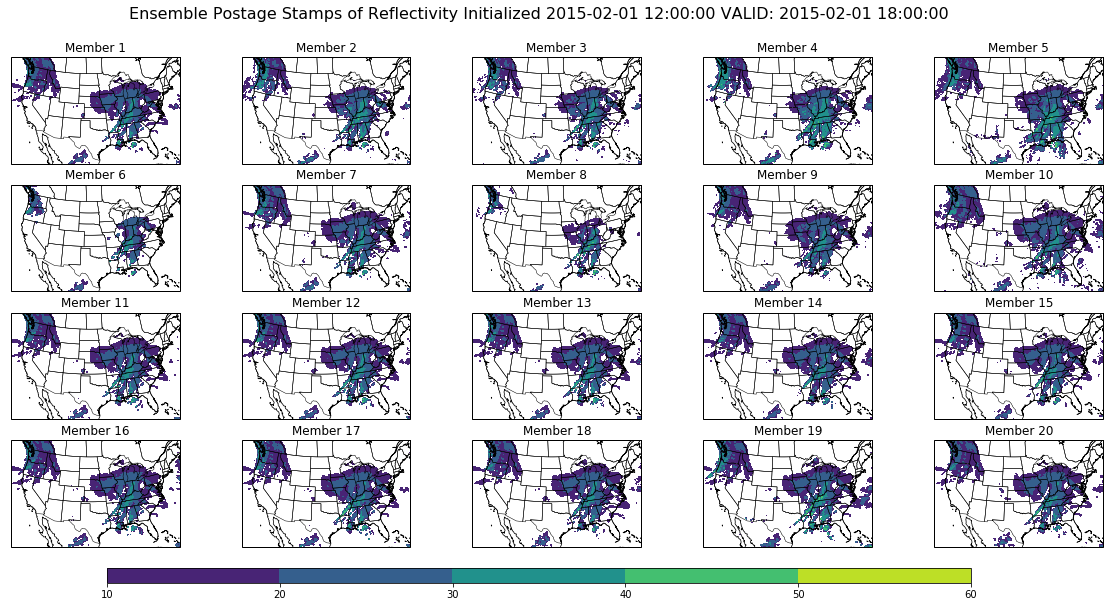

In [91]:
# Choose a time to plot
time = 2
contours = np.arange(10,  70, 10)

fig, axes = plot_panels((20, 10), (4, 5), 20, projection=plotcrs)
cmap = plt.cm.viridis

# Plot the desired contours for each member
for i in range(20):
    # Set up the figure and add a map background
    axes[i].set_extent((-123, -74, 25, 51), ccrs.PlateCarree())
    axes[i].coastlines('50m', edgecolor='black', linewidth=0.75)
    axes[i].add_feature(states_provinces, edgecolor='black', linewidth=0.5)
    cf = axes[i].contourf(lon, lat, refl['mem'+str(i+1)][time,], contours, cmap=cmap, transform=ccrs.PlateCarree())
    axes[i].set_title('Member '+str(i+1))

# Add a colorbar
fig.subplots_adjust(bottom=0.2)
cbax = fig.add_axes([0.2, 0.15, 0.6, 0.02])
cb = fig.colorbar(cf, cax=cbax, orientation='horizontal', shrink=0.1, pad=0.05)

# Make some titles
plt.suptitle('Ensemble Postage Stamps of Reflectivity Initialized %s' %( vtimes[0]) +' VALID: %s' % (vtimes[time]), fontsize=16, y=0.95)
plt.show()